## Observations and Insights

## Dependencies and starter code

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data_set = pd.merge(study_results, mouse_metadata, how = 'left', on= 'Mouse ID' )

merged_data_set

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumour_volume_mean = merged_data_set.groupby(['Drug Regimen', 'Timepoint']).mean()["Tumor Volume (mm3)"]
tumour_volume_median= merged_data_set.groupby(['Drug Regimen', 'Timepoint']).median()["Tumor Volume (mm3)"]
tumour_volume_SD=merged_data_set.groupby(['Drug Regimen', 'Timepoint']).std()["Tumor Volume (mm3)"]
tumour_volume_var = merged_data_set.groupby(['Drug Regimen', 'Timepoint']).var()["Tumor Volume (mm3)"]
tumour_volume_sem = merged_data_set.groupby(['Drug Regimen', 'Timepoint']).sem()["Tumor Volume (mm3)"]
summary_Statistics = pd.DataFrame({"Tumour Volume Mean": tumour_volume_mean,
                                            "Tumour Volume Median": tumour_volume_median,
                                            "Tumour Volume SD": tumour_volume_SD,
                                            "Tumour Volume Varience": tumour_volume_var})

summary_Statistics


Tumour Volume Mean  Tumour Volume Median  \
Drug Regimen Timepoint                                             
Capomulin    0                   45.000000             45.000000   
             5                   44.266086             45.597064   
             10                  43.084291             43.421014   
             15                  42.064317             42.798160   
             20                  40.716325             40.716428   
...                                    ...                   ...   
Zoniferol    25                  55.432935             55.676604   
             30                  57.713531             57.419744   
             35                  60.089372             60.365832   
             40                  62.916692             62.274543   
             45                  65.960888             65.684689   

                        Tumour Volume SD  Tumour Volume Varience  
Drug Regimen Timepoint                                            
Capomulin    0                  0.000000                0.000000  
             5                  2.242964                5.030889  
             10                 3.513422               12.344133  
             15                 4.108369               16.878693  
             20                 4.362915               19.035028  
...                                  ...                     ...  
Zoniferol    25                 2.410052                5.808348  
             30                 3.098552                9.601024  
             35                 3.297993               10.876760  
             40                 3.736102               13.958456  
             45                 3.755037               14.100301  

[100 rows x 4 columns]

## Bar plots

<BarContainer object of 10 artists>

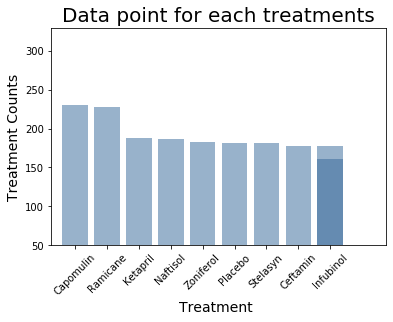

In [102]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_set = merged_data_set.groupby("Drug Regimen")["Timepoint"].count()
new = pd.DataFrame(data_set)

x_axis = ["Capomulin","Ramicane", "Ketapril" ,"Naftisol", "Zoniferol" , "Placebo", "Stelasyn","Ceftamin", "Infubinol" , "Infubinol"]
y_pos = np.arange(len(x_axis))
#y_axis = new["Drug Regimen"]
y_axis= merged_data_set['Drug Regimen'].value_counts()[:20]

plt.ylim(50, y_axis.max() +100)
plt.xlim(-0.75,  len(x_axis)-.25)

plt.title("Data point for each treatments", fontsize=20)
plt.xlabel("Treatment ", fontsize=14)
plt.ylabel("Treatment Counts", fontsize=14)

#tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)
    #plt.xticks(tick_locations, ["Capomulin","Ramicane", "Ketapril" ,"Naftisol", "Zoniferol" , "Placebo", "Stelasyn","Ceftamin","Infubinol"])
plt.bar(x_axis, y_axis, color=(0.2, 0.4, 0.6, 0.6), alpha=0.5, align="center")


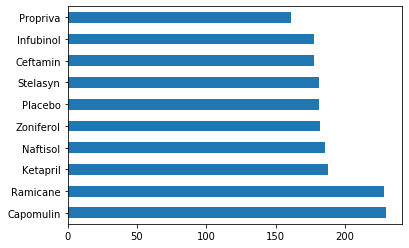

In [104]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
merged_data_set['Drug Regimen'].value_counts()[:20].plot(kind='barh')
    

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen